In [23]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [24]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/shearing/"
print("data path: ", data_path)

level: level2 & tutorial name: nanosheared-electrolyte
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/nanosheared-electrolyte/shearing/


In [25]:
_, z, _, density_water, velocity_water = np.loadtxt(data_path + "water.profile_1A.dat", skiprows=4).T
_, z, _, density_solid, velocity_solid = np.loadtxt(data_path + "wall.profile_1A.dat", skiprows=4).T
_, z, _, density_ions, velocity_ions = np.loadtxt(data_path + "ions.profile_1A.dat", skiprows=4).T
z /= 10 # nm
velocity_water *= 1e5 # m/s
velocity_solid *= 1e5 # m/s
velocity_ions *= 1e5 # m/s

In [26]:
hs = 1.8e-9 # m
zs = np.arange(-hs/2, hs/2, hs/1000) # m
vs = zs * 20*2/hs

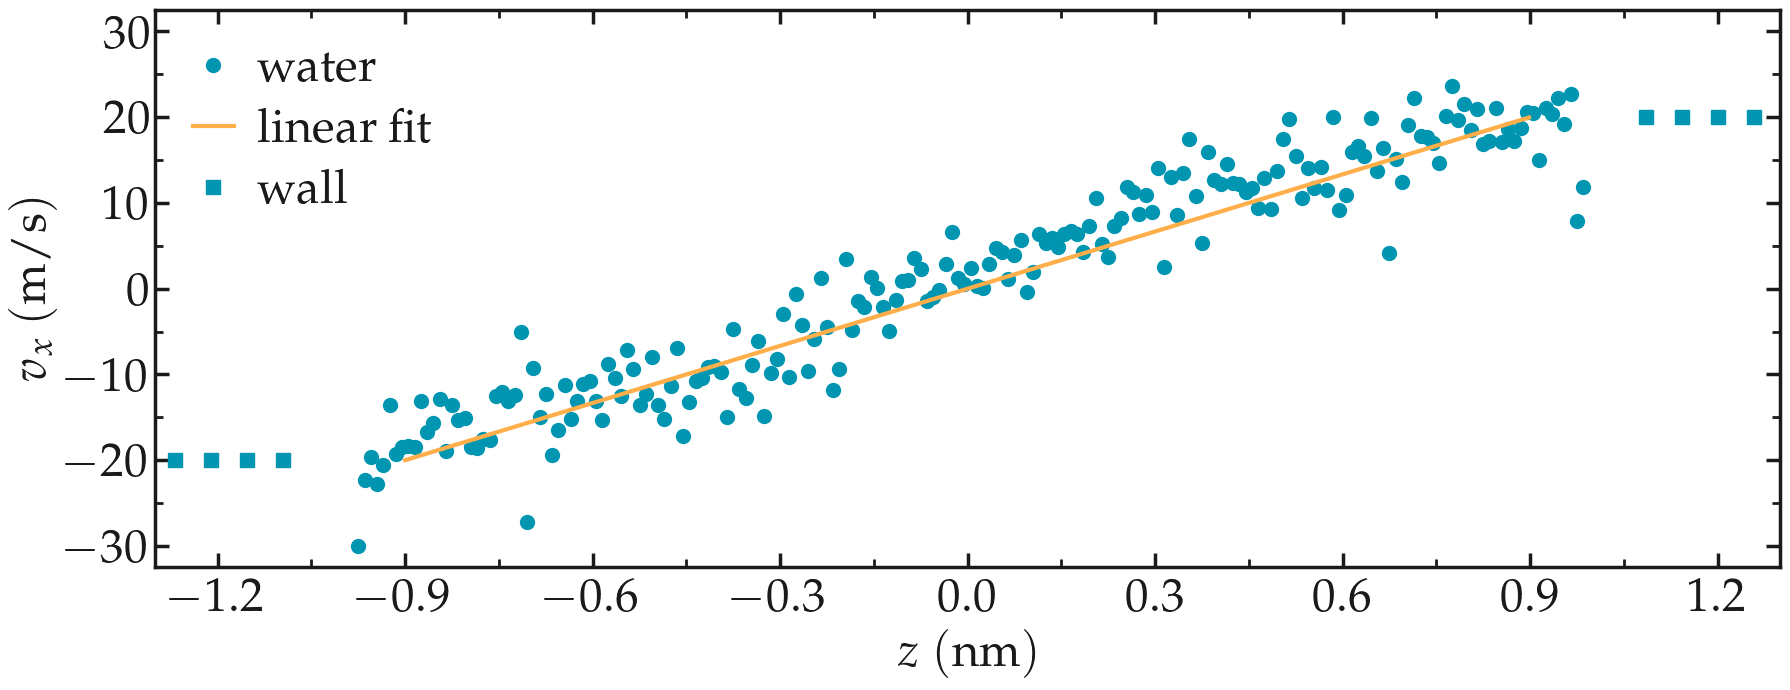

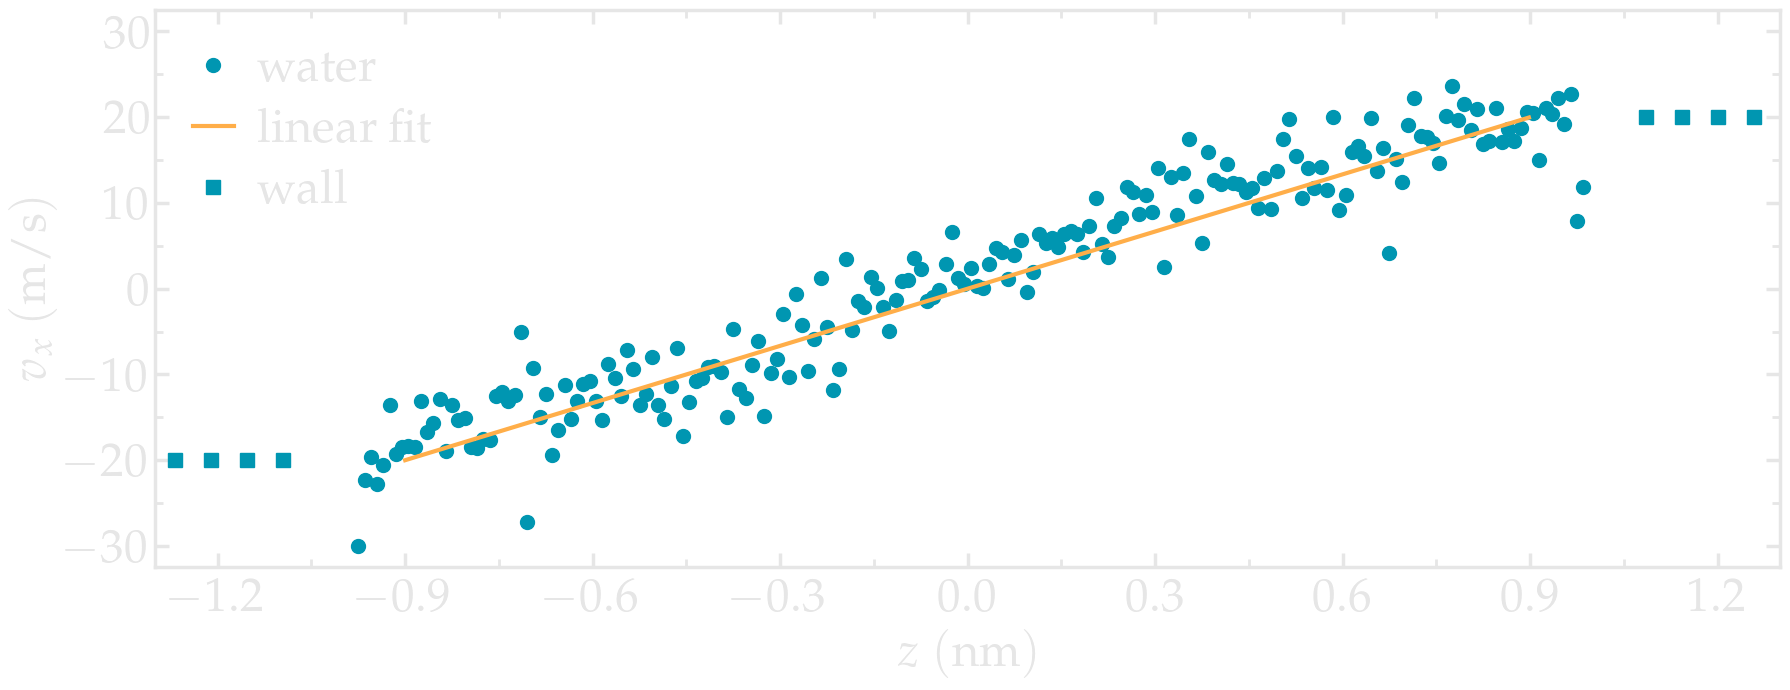

In [34]:
filename = "shearing"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(z[density_water>0.02], velocity_water[density_water>0.02],
                'o', color=colors["myblue"], markersize=10, label=r'$\mathrm{water}$')
    ax[-1].plot(zs*1e9, vs, '-', color=colors["myorange"],
                linewidth=3, label=r'$\mathrm{linear ~ fit}$')
    #ax[-1].plot(z[density_ions>0.02], velocity_ions[density_ions>0.02], 's', color=colors["myorange"], markersize=10, label=r'ions')
    v_wall = np.mean(velocity_solid[(density_solid>0) & (z<0)])
    z0 = np.linspace(np.min(z[(density_solid>0) & (z<0)]), np.max(z[(density_solid>0) & (z<0)]), 10)
    ax[-1].plot(z0, z0*0+ v_wall, 's', color=colors["myblue"], markersize=10, label=r'$\mathrm{wall}$')
    v_wall = np.mean(velocity_solid[(density_solid>0) & (z>0)])
    z0 = np.linspace(np.min(z[(density_solid>0) & (z>0)]), np.max(z[(density_solid>0) & (z>0)]), 10)
    ax[-1].plot(z0, z0*0+ v_wall, 's', color=colors["myblue"], markersize=10)
    complete_panel(ax[-1], r'$z ~ \mathrm{(nm)}$', r'$v_x ~ \mathrm{(m/s)}$',
                legend=True, axis_color=mygray, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
                   y_ticks=np.arange(-30, 40, 10), y_boundaries=(-32.5, 32.5))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

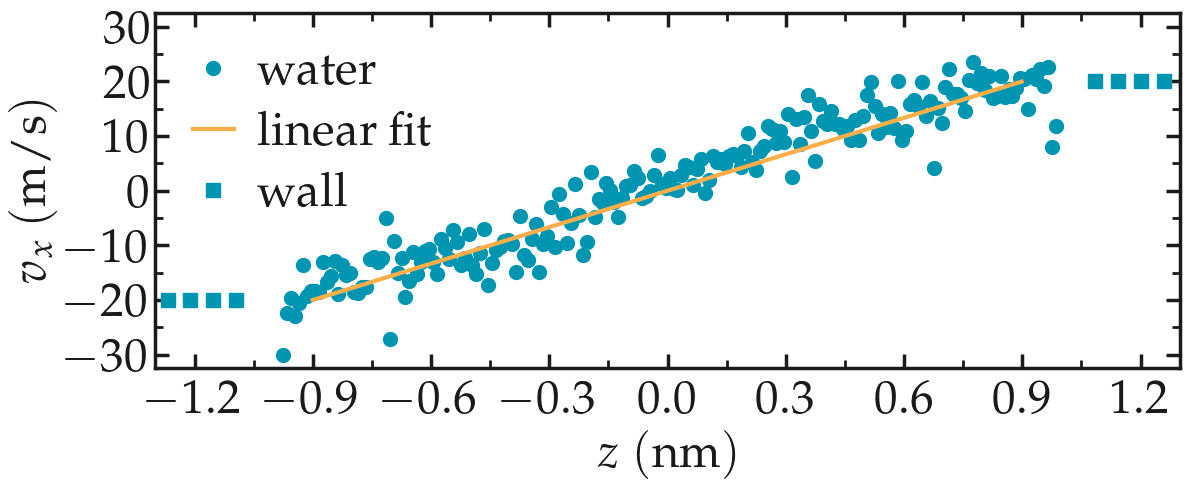

In [33]:
filename = "velocity-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,5))
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(z[density_water>0.02], velocity_water[density_water>0.02],
            'o', color=colors["myblue"], markersize=10, label=r'$\mathrm{water}$')
ax[-1].plot(zs*1e9, vs, '-', color=colors["myorange"],
            linewidth=3, label=r'$\mathrm{linear ~ fit}$')
#ax[-1].plot(z[density_ions>0.02], velocity_ions[density_ions>0.02], 's', color=colors["myorange"], markersize=10, label=r'ions')
v_wall = np.mean(velocity_solid[(density_solid>0) & (z<0)])
z0 = np.linspace(np.min(z[(density_solid>0) & (z<0)]), np.max(z[(density_solid>0) & (z<0)]), 10)
ax[-1].plot(z0, z0*0+ v_wall, 's', color=colors["myblue"], markersize=10, label=r'$\mathrm{wall}$')
v_wall = np.mean(velocity_solid[(density_solid>0) & (z>0)])
z0 = np.linspace(np.min(z[(density_solid>0) & (z>0)]), np.max(z[(density_solid>0) & (z>0)]), 10)
ax[-1].plot(z0, z0*0+ v_wall, 's', color=colors["myblue"], markersize=10)
complete_panel(ax[-1], r'$z ~ \mathrm{(nm)}$', r'$v_x ~ \mathrm{(m/s)}$',
            legend=True, axis_color=mygray, xpad=8)
set_boundaries(plt, x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
                y_ticks=np.arange(-30, 40, 10), y_boundaries=(-32.5, 32.5))
#add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)

In [29]:
_, z, _, density_water, velocity_water = np.loadtxt(data_path + "water.profile_0.1A.dat", skiprows=4).T
_, z, _, density_solid, velocity_solid = np.loadtxt(data_path + "wall.profile_0.1A.dat", skiprows=4).T
_, z, _, density_ions, velocity_ions = np.loadtxt(data_path + "ions.profile_0.1A.dat", skiprows=4).T
z /= 10 # nm
velocity_water *= 1e5 # m/s
velocity_solid *= 1e5 # m/s
velocity_ions *= 1e5 # m/s

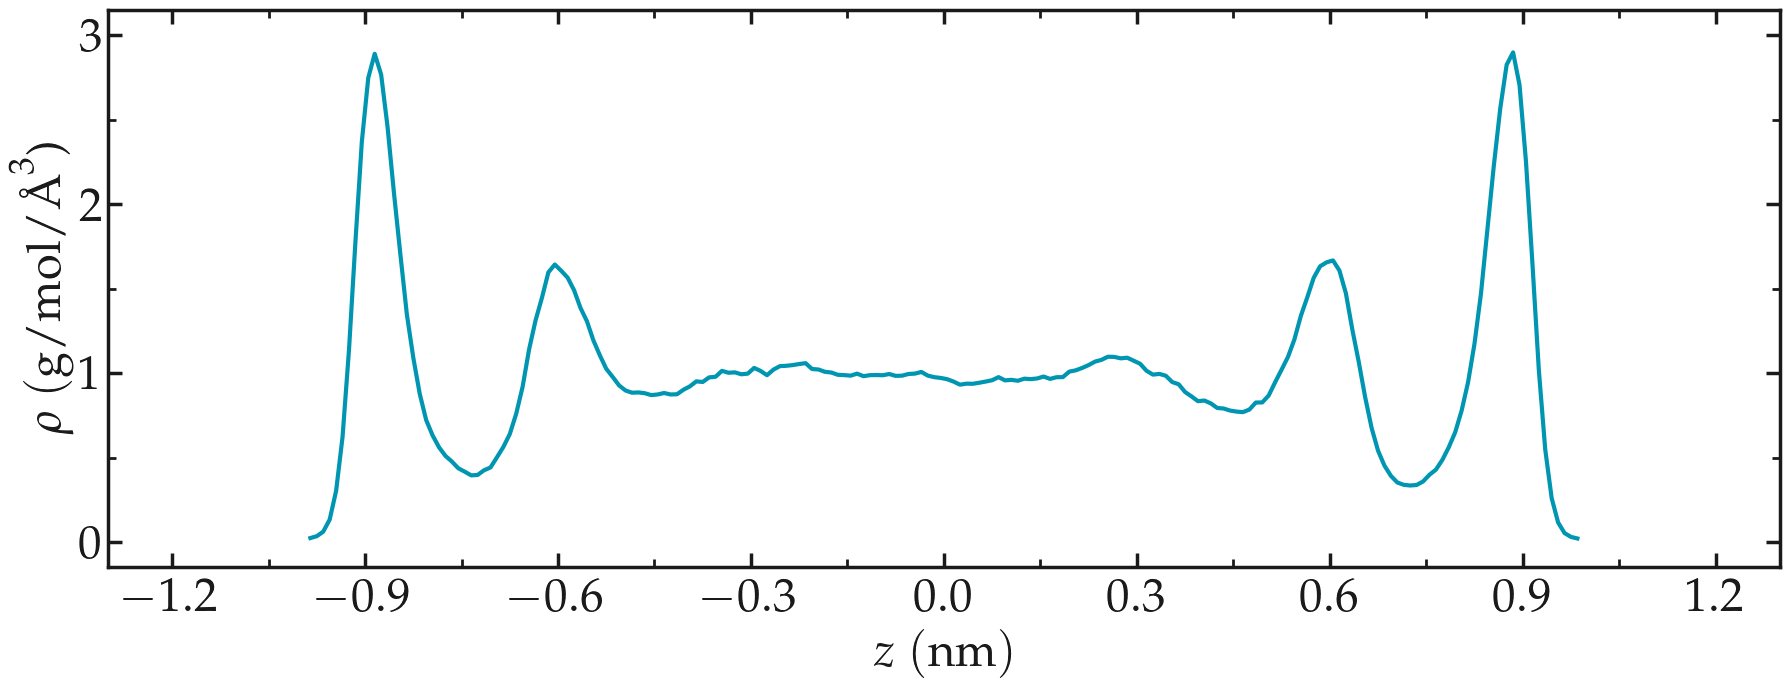

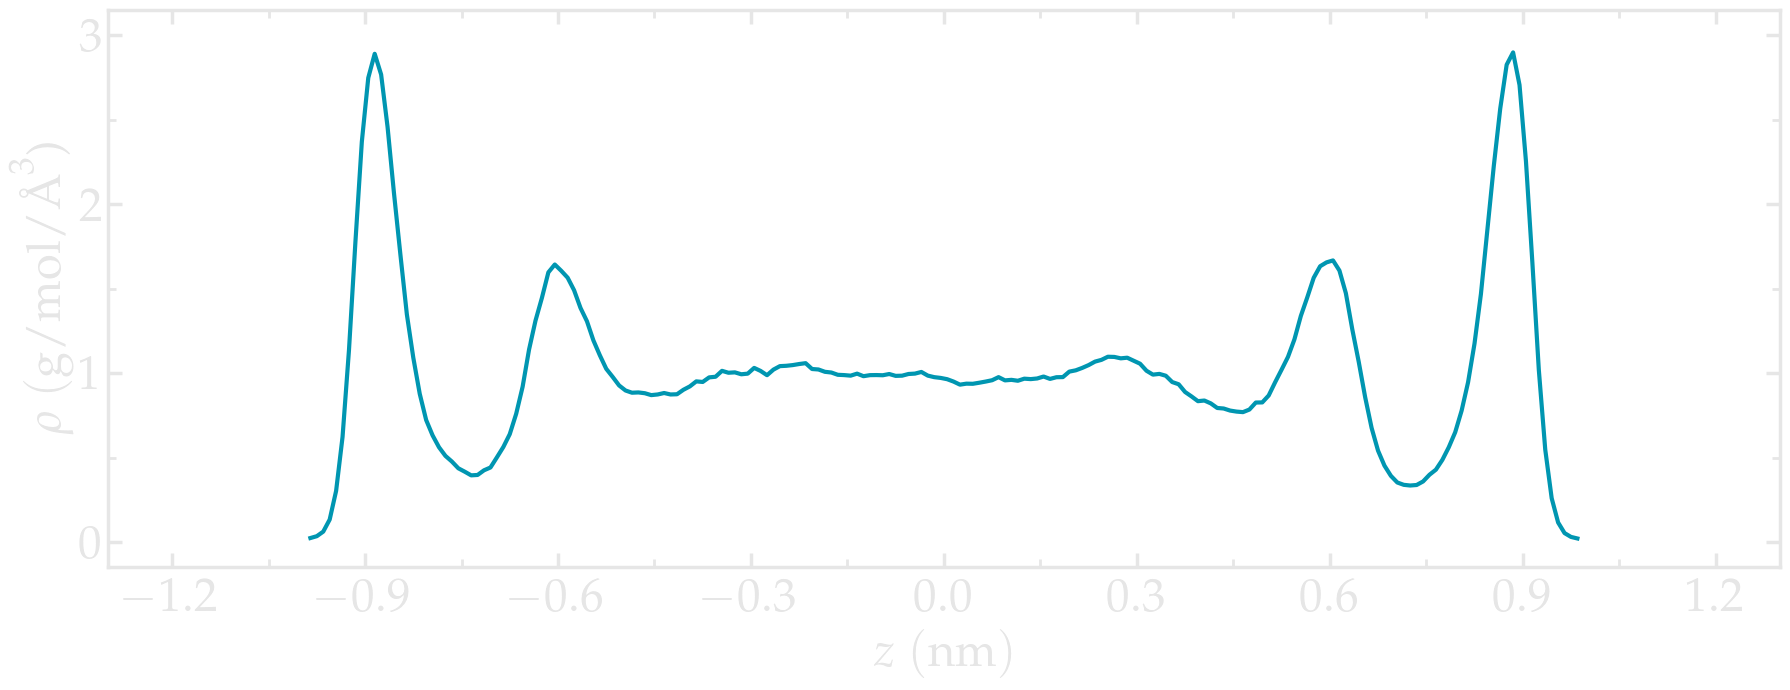

In [30]:
filename = "density"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(z[density_water>0.02], density_water[density_water>0.02], color=colors["myblue"], linewidth=3, label=r'water')
    #ax[-1].plot(z[density_ions>0.002], density_ions[density_ions>0.002], color=colors["myorange"], linewidth=3, label=r'ions')
    #ax[-1].plot(z[(density_solid>0) & (z<0)], density_solid[(density_solid>0) & (z<0)], color=mygray, linewidth=3, label=r'wall')
    #ax[-1].plot(z[(density_solid>0) & (z>0)], density_solid[(density_solid>0) & (z>0)], color=mygray, linewidth=3)
    complete_panel(ax[-1], r'$z ~ \mathrm{(nm)}$', r'$\rho ~ (\mathrm{g/mol/\AA}^3$)',
                    legend=False, axis_color=mygray, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
                y_ticks=np.arange(0, 3.1, 1), y_boundaries=(-0.15, 3.15))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

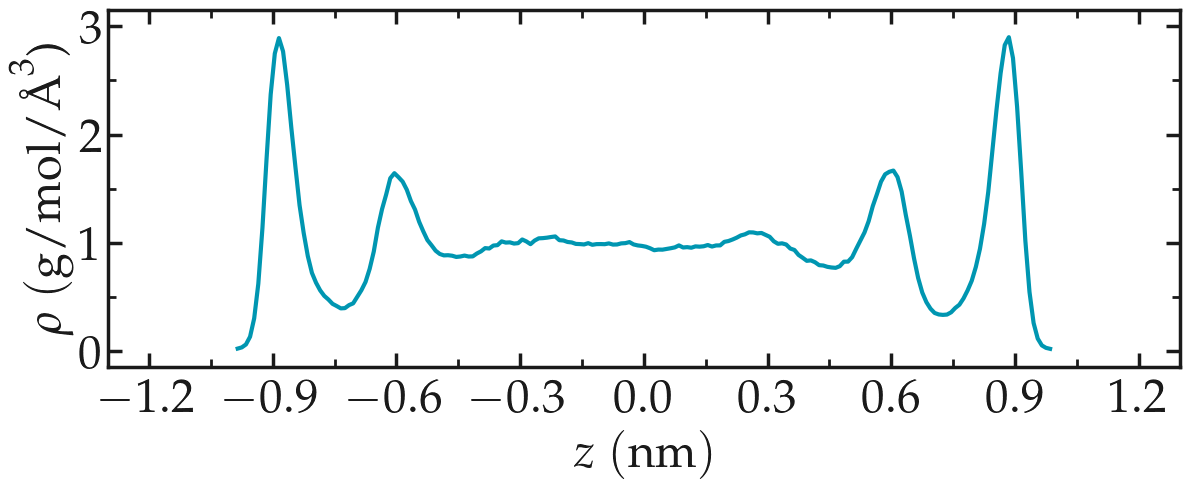

In [31]:
filename = "density-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,5))
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(z[density_water>0.02], density_water[density_water>0.02], color=colors["myblue"], linewidth=3, label=r'water')
#ax[-1].plot(z[density_ions>0.002], density_ions[density_ions>0.002], color=colors["myorange"], linewidth=3, label=r'ions')
#ax[-1].plot(z[(density_solid>0) & (z<0)], density_solid[(density_solid>0) & (z<0)], color=mygray, linewidth=3, label=r'wall')
#ax[-1].plot(z[(density_solid>0) & (z>0)], density_solid[(density_solid>0) & (z>0)], color=mygray, linewidth=3)
complete_panel(ax[-1], r'$z ~ \mathrm{(nm)}$', r'$\rho ~ (\mathrm{g/mol/\AA}^3$)',
                legend=False, axis_color=mygray, xpad=8)
set_boundaries(plt, x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
               y_ticks=np.arange(0, 3.1, 1), y_boundaries=(-0.15, 3.15))
#add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)